In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.neighbors import LocalOutlierFactor
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import IsolationForest

In [2]:
# Load data from CSV file
file_path = '/kaggle/input/user-address/process_poly_transaction_final.csv'  # Replace 'your_file_path.csv' with the actual file path
df = pd.read_csv(file_path)
user_addresses = df['user_address']

In [3]:
df.head()

,user_address,user_in_degree,user_out_degree,user_unique_in_degree,user_unique_out_degree,user_mean_in,user_mean_out,user_stddev_in,user_stddev_out,num_in_transactions_per_timestamp,num_out_transactions_per_timestamp,in_transaction_rate,out_transaction_rate,balance,in_velocity,out_velocity,in_acceleration,out_acceleration
0,0x000000000000000000000000000000000000dead,16,0,8,0,5.327616e+15,0.000000e+00,2.128381e+16,0.0,1.142857,0.000000,1.142857,0.000000,0.0,9.110247e+11,0.0,9.736603e+06,0.0
1,0x00000000000000adc04c56bf30ac9d3c0aaf14dc,15441,0,4726,0,9.772786e+18,0.000000e+00,1.319240e+20,0.0,1.162201,0.000000,1.162201,0.000000,0.0,1.968453e+19,0.0,2.567770e+15,0.0
2,0x000000026b746917fefb1cf650ba6860a8ff8fef,0,4,0,3,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000,1.000000,0.000000,1.000000,0.0,0.000000e+00,0.0,0.000000e+00,0.0
3,0x000000091274f24f0c138792c7a6299ee0f1fe9f,0,16,0,1,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000,1.454545,0.000000,1.454545,0.0,0.000000e+00,0.0,0.000000e+00,0.0
4,0x0000004bdc80d78eb0a4ba937d3a6e3a1644090d,0,1,0,1,0.000000e+00,3.682000e+16,0.000000e+00,0.0,0.000000,1.000000,0.000000,1.000000,0.0,0.000000e+00,0.0,0.000000e+00,0.0


In [4]:
df_drop = df.drop(['user_address'], axis=1)



In [5]:
# Normalize the data
scaler = StandardScaler()
normalized_data = scaler.fit_transform(df_drop)


In [6]:
# # Perform outlier detection using Local Outlier Factor (LOF)
isolation_forest = IsolationForest(contamination=0.01, random_state=42)  # Adjust parameters as needed
outlier_scores = isolation_forest.fit_predict(normalized_data)

# Perform outlier detection using Local Outlier Factor (LOF)
# lof = LocalOutlierFactor(n_neighbors=100, contamination=0.01)  # Adjust parameters as needed
# outlier_scores = lof.fit_predict(normalized_data)

# Identify outliers (label -1 in LOF output)
outliers = normalized_data[outlier_scores == -1]


/tmp/ipykernel_376/2551331526.py:8: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(reduced_data[outlier_scores == -1, 0], reduced_data[outlier_scores == -1, 1], c='orange', edgecolor='k', s=50, label='Outliers', marker='x')


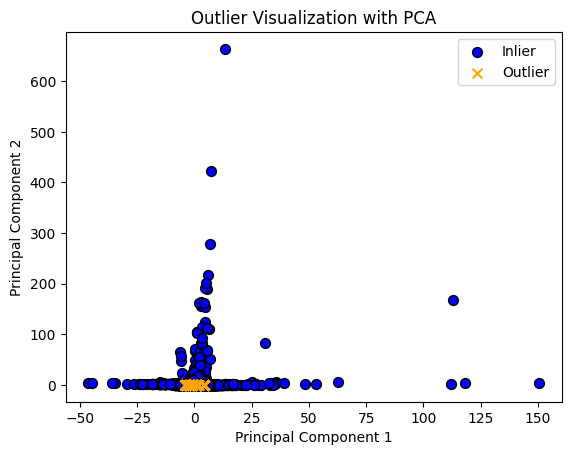

In [12]:
# Apply PCA for dimensionality reduction to 2 features
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(normalized_data)

# Visualize the entire dataset with PCA, distinguishing outliers

plt.scatter(reduced_data[outlier_scores == 1, 0], reduced_data[outlier_scores == 1, 1], c='blue', edgecolor='k', s=50, label='Inliers')
plt.scatter(reduced_data[outlier_scores == -1, 0], reduced_data[outlier_scores == -1, 1], c='orange', edgecolor='k', s=50, label='Outliers', marker='x')

plt.title('Outlier Visualization with PCA')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(["Inlier", "Outlier"], loc ="upper right")
plt.show()

In [10]:
# Save the merged data to a new CSV file
# merged_df.to_csv('merged_data.csv', index=False)
# Identify outliers (label -1 in LOF output)

# Show the number of inliers and outliers
num_inliers = len(df) - np.sum(outlier_scores == -1)
num_outliers = np.sum(outlier_scores == -1)
print(f"Number of inliers: {num_inliers}")
print(f"Number of outliers: {num_outliers}")



Number of inliers: 649362
Number of outliers: 6558


In [11]:
outliers = df[outlier_scores == -1]
# # Save a CSV file containing only the outliers with all columns
outliers.to_csv('isolation_outliers_poly.csv', index=False)